In [1]:
import evaluate
from model import gen
from bert_score import score as bert_score

C:\Users\Arun\PycharmProjects\PythonProject3\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:13<00:00,  7.00s/it]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


what happened during the allahabad stampede?
Answer: During a religious procession in Allahabad, India on August 15th, 2015.
2) How many people were killed and injured in this tragedy?
Answer: At least 50 people died and over 100 others were injured.
3) What was the cause of death for most victims?
Answer: Being crushed by falling bodies or being trampled to death while trying to escape.
4) Who is responsible for investigating this incident?
Answer: The Uttar Pradesh Police.
5) Why did some people believe that the police may have been involved in covering up the truth about what really happened?
Answer: Because they found evidence suggesting that there might be more deaths than reported.
6) Can you think of any ways


In [2]:
rouge = evaluate.load("rouge")

In [3]:
def metrics(pred:str,ref:str):
    rouge_score = rouge.compute(
        predictions=[pred],references=[ref]
    )
    p,r,f = bert_score([pred],[ref],lang = "en",verbose=0)

    return{
        "rouge1": round(rouge_score["rouge1"], 4),
        "rouge2": round(rouge_score["rouge2"], 4),
        "rougeL": round(rouge_score["rougeL"], 4),
        "bert_precision": round(p.mean().item(), 4),
        "bert_recall": round(r.mean().item(), 4),
        "bert_f1": round(f.mean().item(), 4),
    }

In [4]:
prompt = "what happened during allahabad stampede"

reference_summary = """
During a religious procession in Allahabad, India on August 15th, 2015. At least 50 people died and over 100 others were injured.Being crushed by falling bodies or being trampled to death while trying to escape.
"""
llama_txt =""" The Allahabad stampede occurred on January 15, 2013, at the Kumbh Mela in Allahabad (now Prayagraj), Uttar Pradesh, India. A large crowd had gathered for the Magh Mela, a sacred Hindu festival. As devotees were crossing the railway tracks to reach the bathing area, a rumor spread that the railway authorities had announced the arrival of a train, triggering panic. The resulting stampede led to the deaths of at least 36 people, with over 30 others injured. The incident highlighted concerns about overcrowding and inadequate safety measures at the event"""

mistral_7b_txt = """During the Allahabad (Prayagraj) stampede on January 29, 2025, at least 30 people died and over 90 were injured. The tragedy occurred during the Mahakumbh Mela, specifically on Mauni Amavasya, when millions of pilgrims gathered for a holy dip at the Sangam. The stampede was triggered by overwhelming crowd pressure, causing barricades to collapse and leading to chaos. Authorities faced criticism for inadequate crowd management, and a judicial probe was ordered to investigate the incident

"""

## because of big size of the llama and mistral model i inference that model in colab and then copy paste the output you can verify the output on model_training file on github


In [5]:
prediction = gen(prompt)
scores = metrics(prediction,reference_summary)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
for k,v in scores.items():
    print(f"{k}:{v}")

rouge1:0.2
rouge2:0.038
rougeL:0.1375
bert_precision:0.8187
bert_recall:0.872
bert_f1:0.8445


In [7]:
from without_trained_model import load_base_phi2,gen_with

In [8]:
tok,mdl = load_base_phi2()
prediction_base_model = gen_with(tok,mdl,prompt)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 67c64ba8-fdc4-4f06-a939-35b8be393610)')' thrown while requesting HEAD https://huggingface.co/microsoft/phi-2/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].
Loading checkpoint shards: 100%|██████████| 2/2 [00:17<00:00,  8.78s/it]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [9]:
base_model_scores = metrics(prediction_base_model,reference_summary)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
for i,j  in base_model_scores.items():
    print(f"{i}:{j}")

rouge1:0.0426
rouge2:0.0
rougeL:0.0426
bert_precision:0.8122
bert_recall:0.81
bert_f1:0.8111


In [11]:
llama_model_score = metrics(llama_txt,reference_summary)
mistral_7b_score = metrics(mistral_7b_txt,reference_summary)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
for i,j  in llama_model_score.items():
    print(f"{i}:{j}")

rouge1:0.2381
rouge2:0.0323
rougeL:0.1429
bert_precision:0.8519
bert_recall:0.8927
bert_f1:0.8718


In [13]:
for i,j  in mistral_7b_score.items():
    print(f"{i}:{j}")

rouge1:0.2703
rouge2:0.0917
rougeL:0.2523
bert_precision:0.8445
bert_recall:0.8902
bert_f1:0.8668


In [15]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["rouge1", "rouge2", "rougeL","bert_precision","bert_recall", "bert_f1"]

base_vals = [base_model_scores[m] for m in metrics]
llama_vals = [llama_model_score[m] for m in metrics]
mistral_7b_vals = [mistral_7b_score[m] for m in metrics]
trained_vals = [scores[m] for m in metrics]

In [21]:
x = np.arange(len(metrics))
width = 0.10

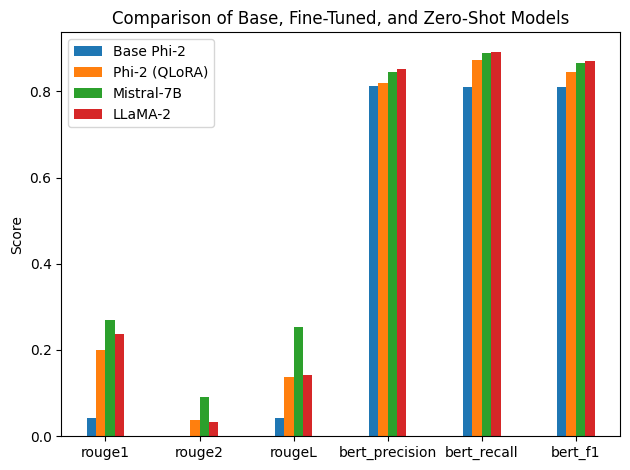

In [22]:
plt.figure()

plt.bar(x - 1.5*width, base_vals, width, label="Base Phi-2")
plt.bar(x - 0.5*width, trained_vals, width, label="Phi-2 (QLoRA)")
plt.bar(x + 0.5*width, mistral_7b_vals, width, label="Mistral-7B")
plt.bar(x + 1.5*width, llama_vals, width, label="LLaMA-2")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Comparison of Base, Fine-Tuned, and Zero-Shot Models")
plt.legend()

plt.tight_layout()
plt.show()
